In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv


In [2]:
load_dotenv()

True

In [10]:
model = ChatGoogleGenerativeAI(model="gemini-2.0-flash")

In [5]:
# create a state

class LLMState(TypedDict):

    question: str
    answer: str
    

In [7]:
def llm_qa(state: LLMState) -> LLMState:

    # extract the que from state
    question = state['question']

    #form a prompt
    prompt = f'Answer the following question {question}'

    # ask that que to the LLM
    answer = model.invoke(prompt).content

    # update the answer in the state

    state['answer'] = answer

    return state



In [8]:
# create our graph

graph = StateGraph(LLMState)

# add your nodes

graph.add_node('llm_qa', llm_qa)

# add your edges 
graph.add_edge(START, 'llm_qa')
graph.add_edge('llm_qa', END)

# compile the graph
workflow = graph.compile()


In [12]:
# execute the graph
initial_state = {'question':'Who is the first prime minister of India?'}

final_state = workflow.invoke(initial_state)

print(final_state['answer'])

The first prime minister of India was **Jawaharlal Nehru**.


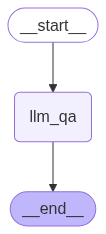

In [13]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())